In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [4]:
print(tf.__version__)

2.1.0


In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [6]:
df_input = pd.read_csv('current density2 0.4-0.9V', usecols=[1,2,3])

In [7]:
df_output = pd. read_csv('current density2 0.4-0.9V', usecols=[4])

In [8]:
df_input.shape

(31636, 3)

In [9]:
df_output.shape

(31636, 1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.1, random_state=0)

In [11]:
print(x_train.shape,x_test.shape)

(28472, 3) (3164, 3)


In [12]:
x_train

,x座標,y座標,V[V]
17676,-1.063164,0.480150,0.224769
30131,-0.569786,-1.450546,1.493249
11031,1.284606,0.764567,-0.409472
6840,-0.022068,-0.049329,-1.360832
29412,0.917878,-1.068396,1.493249
...,...,...,...
13123,-1.677761,-1.602093,-0.409472
19648,0.253005,-0.367788,0.541889
9845,-0.583430,0.141746,-0.726592
10799,1.599377,1.520386,-0.409472


In [13]:
y_train

,i[A/m^2]
17676,-0.240928
30131,-1.301885
11031,-0.004455
6840,1.578582
29412,-1.347140
...,...
13123,1.276845
19648,-0.543908
9845,1.211591
10799,-0.095977


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers, initializers

weights = [com.get_weights() for com in model.layers[0:]]
model = Sequential()

model.add(Dense(units=32, input_shape=(3,), activation='tanh'))  
model.add(Dense(units=10, activation='tanh'))  #xとyが-1～1なのでtanh
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=1, activation='linear'))  #隠れ層3層でやってみる

model.compile(loss='mean_squared_error',    #出力は?連続値?なので平均二乗誤差
              optimizer='adam',             #とりあえずadamで
              metrics=['mse'])

In [23]:
history = model.fit(x=x_train,
                     y=y_train,
                     epochs=20,
                     batch_size=200,
                     verbose=1,
                     validation_data=(x_test, y_test))

Train on 28472 samples, validate on 3164 samples
Epoch 1/20
28472/28472 [==============================] - 1s 23us/sample - loss: 0.1672 - mse: 0.1672 - val_loss: 0.1189 - val_mse: 0.1189
Epoch 2/20
28472/28472 [==============================] - 0s 10us/sample - loss: 0.1112 - mse: 0.1112 - val_loss: 0.1064 - val_mse: 0.1064
Epoch 3/20
28472/28472 [==============================] - 0s 11us/sample - loss: 0.1037 - mse: 0.1037 - val_loss: 0.1010 - val_mse: 0.1010
Epoch 4/20
28472/28472 [==============================] - 0s 10us/sample - loss: 0.1009 - mse: 0.1009 - val_loss: 0.0988 - val_mse: 0.0988
Epoch 5/20
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0995 - mse: 0.0995 - val_loss: 0.0968 - val_mse: 0.0968
Epoch 6/20
28472/28472 [==============================] - 0s 11us/sample - loss: 0.0987 - mse: 0.0987 - val_loss: 0.0970 - val_mse: 0.0970
Epoch 7/20
28472/28472 [==============================] - 0s 13us/sample - loss: 0.0989 - mse: 0.0989 - val_loss: 0.09

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

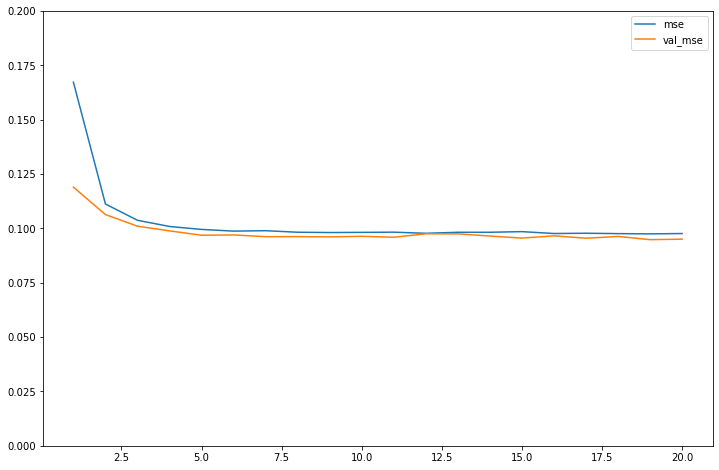

In [29]:
mse = history_dict['mse']
val_mse = history_dict['val_mse']
epochs = range(1, len(mse) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, mse, label='mse')
plt.plot(epochs, val_mse, label='val_mse')
plt.ylim((0,0.2))
plt.legend(loc = 'best')
plt.show()

In [30]:
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[2].set_weights(weights[2])

In [32]:
model.save('i_predict')

INFO:tensorflow:Assets written to: i_predict\assets
